In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
import sklearn
from scipy.io import wavfile
from PNCC.pncc import pncc

In [3]:
directory = input("Enter Directory\t\t\t: ")
os.chdir(rf"{directory}")
listFile = os.listdir()
newPath = os.path.join(directory, "wav")
try:
    os.mkdir(newPath)
except OSError as error:
    print(f"{error}\n")
for file in listFile:
    if len(file.split(".")) == 2 and file.split(".")[1] == "mp3":
        print(f"converting {file} at : {newPath}\{file.split('.')[0]}.wav")
        os.system(f"ffmpeg -i {file} {file.split('.')[0]}.wav")
        os.rename(os.path.join(directory, f"{file.split('.')[0]}.wav"), os.path.join(newPath, f"{file.split('.')[0]}.wav"))

converting muda10a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda10a.wav
converting muda10b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda10b.wav
converting muda10c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda10c.wav
converting muda11a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda11a.wav
converting muda11b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda11b.wav
converting muda11c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda11c.wav
converting muda12a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\muda\wav\muda12a.wav
converting muda12b.mp3 at : D:\Cool Yeah\

In [4]:
directory = input("Enter Directory\t\t\t: ")
os.chdir(rf"{directory}")
listFile = os.listdir()
newPath = os.path.join(directory, "wav")
try:
    os.mkdir(newPath)
except OSError as error:
    print(f"{error}\n")
for file in listFile:
    if len(file.split(".")) == 2 and file.split(".")[1] == "mp3":
        print(f"converting {file} at : {newPath}\{file.split('.')[0]}.wav")
        os.system(f"ffmpeg -i {file} {file.split('.')[0]}.wav")
        os.rename(os.path.join(directory, f"{file.split('.')[0]}.wav"), os.path.join(newPath, f"{file.split('.')[0]}.wav"))

converting mtg10a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg10a.wav
converting mtg10b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg10b.wav
converting mtg10c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg10c.wav
converting mtg11a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg11a.wav
converting mtg11b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg11b.wav
converting mtg11c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg11c.wav
converting mtg12a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\matang\wav\mtg12a.wav
converting mtg12b.mp3 at : D:\Cool Yeah\S

In [5]:
directory = input("Enter Directory\t\t\t: ")
os.chdir(rf"{directory}")
listFile = os.listdir()
newPath = os.path.join(directory, "wav")
try:
    os.mkdir(newPath)
except OSError as error:
    print(f"{error}\n")
for file in listFile:
    if len(file.split(".")) == 2 and file.split(".")[1] == "mp3":
        print(f"converting {file} at : {newPath}\{file.split('.')[0]}.wav")
        os.system(f"ffmpeg -i {file} {file.split('.')[0]}.wav")
        os.rename(os.path.join(directory, f"{file.split('.')[0]}.wav"), os.path.join(newPath, f"{file.split('.')[0]}.wav"))

converting tua10a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua10a.wav
converting tua10b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua10b.wav
converting tua10c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua10c.wav
converting tua11a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua11a.wav
converting tua11b.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua11b.wav
converting tua11c.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua11c.wav
converting tua12a.mp3 at : D:\Cool Yeah\Semester 118\coconut-maturity-classification\Sample-kelapa\data\cut_sample\tua\wav\tua12a.wav
converting tua12b.mp3 at : D:\Cool Yeah\Semester 118\coconut-m

In [2]:
cocoDataMP3 = {
    'file_name' : [],
    'class_name' : []
}
for matStage in os.listdir('./Sample-kelapa/data/cut_sample'):
    for fileName in os.listdir(f'./Sample-kelapa/data/cut_sample/{matStage}'):
        if os.path.isfile(os.path.join(f'./Sample-kelapa/data/cut_sample/{matStage}', fileName)):
            if matStage.split('-')[-1] == 'muda':
                cocoDataMP3['file_name'].append(fileName)
                cocoDataMP3['class_name'].append('immature')
            elif matStage.split('-')[-1] == 'matang':
                cocoDataMP3['file_name'].append(fileName)
                cocoDataMP3['class_name'].append('mature')
            elif matStage.split('-')[-1] == 'tua':
                cocoDataMP3['file_name'].append(fileName)
                cocoDataMP3['class_name'].append('overmature')

df_mp3 = pd.DataFrame(cocoDataMP3)
df_mp3

,file_name,class_name
0,mtg10a.mp3,mature
1,mtg10b.mp3,mature
2,mtg10c.mp3,mature
3,mtg11a.mp3,mature
4,mtg11b.mp3,mature
...,...,...
175,tua8b.mp3,overmature
176,tua8c.mp3,overmature
177,tua9a.mp3,overmature
178,tua9b.mp3,overmature


In [3]:
cocoDataWAV = {
    'file_name' : [],
    'class_name' : []
}
for matStage in os.listdir('./Sample-kelapa/data/cut_sample'):
    for fileName in os.listdir(f'./Sample-kelapa/data/cut_sample/{matStage}/wav'):
        if os.path.isfile(os.path.join(f'./Sample-kelapa/data/cut_sample/{matStage}/wav', fileName)):
            if matStage.split('-')[-1] == 'muda':
                cocoDataWAV['file_name'].append(fileName)
                cocoDataWAV['class_name'].append('immature')
            elif matStage.split('-')[-1] == 'matang':
                cocoDataWAV['file_name'].append(fileName)
                cocoDataWAV['class_name'].append('mature')
            elif matStage.split('-')[-1] == 'tua':
                cocoDataWAV['file_name'].append(fileName)
                cocoDataWAV['class_name'].append('overmature')

df_wav = pd.DataFrame(cocoDataWAV)
df_wav

,file_name,class_name
0,mtg10a.wav,mature
1,mtg10b.wav,mature
2,mtg10c.wav,mature
3,mtg11a.wav,mature
4,mtg11b.wav,mature
...,...,...
175,tua8b.wav,overmature
176,tua8c.wav,overmature
177,tua9a.wav,overmature
178,tua9b.wav,overmature


In [4]:
base_dir = './Sample-kelapa/data/cut_sample/'
wav_fullpath = []
mp3_fullpath = []

for matStage in os.listdir(base_dir):
    for fileName in os.listdir(os.path.join(base_dir, matStage)):
        if os.path.isfile(os.path.join(os.path.join(base_dir, matStage), fileName)):
            mp3_fullpath.append(f"{base_dir}{matStage}/{fileName}")
            wav_fullpath.append(f"{base_dir}{matStage}/wav/{fileName.split('.')[0]}.wav")
            
df_mp3['full_path'] = mp3_fullpath
df_wav['full_path'] = wav_fullpath

In [5]:
data_csv_mp3 = df_mp3[['full_path', 'file_name', 'class_name']]
data_csv_wav = df_wav[['full_path', 'file_name', 'class_name']]
display(data_csv_wav, data_csv_mp3)

,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature


,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/mtg10a.mp3,mtg10a.mp3,mature
1,./Sample-kelapa/data/cut_sample/matang/mtg10b.mp3,mtg10b.mp3,mature
2,./Sample-kelapa/data/cut_sample/matang/mtg10c.mp3,mtg10c.mp3,mature
3,./Sample-kelapa/data/cut_sample/matang/mtg11a.mp3,mtg11a.mp3,mature
4,./Sample-kelapa/data/cut_sample/matang/mtg11b.mp3,mtg11b.mp3,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/tua8b.mp3,tua8b.mp3,overmature
176,./Sample-kelapa/data/cut_sample/tua/tua8c.mp3,tua8c.mp3,overmature
177,./Sample-kelapa/data/cut_sample/tua/tua9a.mp3,tua9a.mp3,overmature
178,./Sample-kelapa/data/cut_sample/tua/tua9b.mp3,tua9b.mp3,overmature


In [6]:
data_csv_wav.to_csv('coconut-maturity-dataset-wav-luar-kotak.csv', index=False)
data_csv_mp3.to_csv('coconut-maturity-dataset-mp3-luar-kotak.csv', index=False)

In [2]:
df_wav = pd.read_csv('./coconut-maturity-dataset-wav-luar-kotak.csv')
df_mp3 = pd.read_csv('./coconut-maturity-dataset-mp3-luar-kotak.csv')
display(df_wav, df_mp3)

,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10a.wav,mature
1,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10b.wav,mature
2,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg10c.wav,mature
3,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11a.wav,mature
4,./Sample-kelapa/data/cut_sample/matang/wav/mtg...,mtg11b.wav,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/wav/tua8b.wav,tua8b.wav,overmature
176,./Sample-kelapa/data/cut_sample/tua/wav/tua8c.wav,tua8c.wav,overmature
177,./Sample-kelapa/data/cut_sample/tua/wav/tua9a.wav,tua9a.wav,overmature
178,./Sample-kelapa/data/cut_sample/tua/wav/tua9b.wav,tua9b.wav,overmature


,full_path,file_name,class_name
0,./Sample-kelapa/data/cut_sample/matang/mtg10a.mp3,mtg10a.mp3,mature
1,./Sample-kelapa/data/cut_sample/matang/mtg10b.mp3,mtg10b.mp3,mature
2,./Sample-kelapa/data/cut_sample/matang/mtg10c.mp3,mtg10c.mp3,mature
3,./Sample-kelapa/data/cut_sample/matang/mtg11a.mp3,mtg11a.mp3,mature
4,./Sample-kelapa/data/cut_sample/matang/mtg11b.mp3,mtg11b.mp3,mature
...,...,...,...
175,./Sample-kelapa/data/cut_sample/tua/tua8b.mp3,tua8b.mp3,overmature
176,./Sample-kelapa/data/cut_sample/tua/tua8c.mp3,tua8c.mp3,overmature
177,./Sample-kelapa/data/cut_sample/tua/tua9a.mp3,tua9a.mp3,overmature
178,./Sample-kelapa/data/cut_sample/tua/tua9b.mp3,tua9b.mp3,overmature


In [8]:
df_wav['class_name'].value_counts()

class_name
mature        60
immature      60
overmature    60
Name: count, dtype: int64

In [3]:
immature = df_wav[df_wav['class_name'] == "immature"].sample(1, random_state = 4)['full_path'].values[0]
mature = df_wav[df_wav['class_name'] == "mature"].sample(1, random_state = 30)['full_path'].values[0]
overmature = df_wav[df_wav['class_name'] == "overmature"].sample(1, random_state = 3)['full_path'].values[0]

classes = ['immature', 'mature', 'overmature']

print(f"immature\t: {immature}")
print(f"mature\t\t: {mature}")
print(f"overmature\t: {overmature}")

immature	: ./Sample-kelapa/data/cut_sample/muda/wav/muda11b.wav
mature		: ./Sample-kelapa/data/cut_sample/matang/wav/mtg16b.wav
overmature	: ./Sample-kelapa/data/cut_sample/tua/wav/tua5c.wav


In [4]:
def createWaveplot(data, sampleRate, maturity):
    plt.figure(figsize=(8,2))
    plt.title(f'Waveplot for {maturity} maturity', size = 15, pad = 20)
    librosa.display.waveshow(data, sr=sampleRate)
    plt.show()

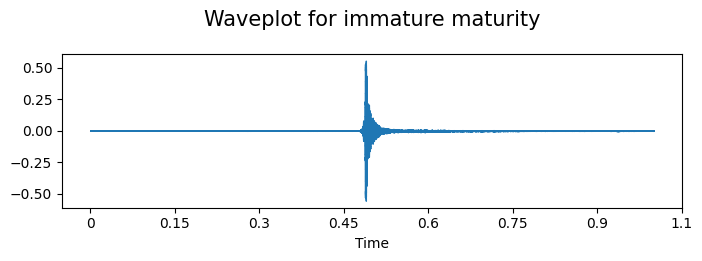

In [5]:
audio_immature, sr_immature = librosa.load(immature)
createWaveplot(audio_immature, sr_immature, "immature")
ipd.Audio(immature)

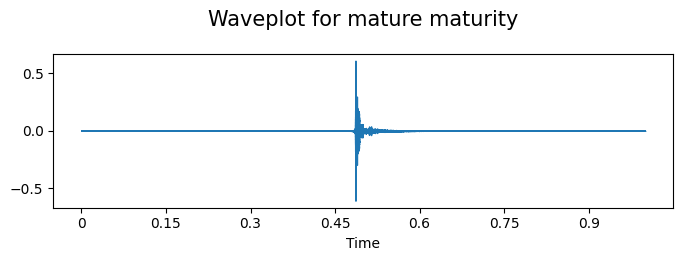

In [8]:
audio_mature, sr_mature = librosa.load(mature)
createWaveplot(audio_mature, sr_mature, "mature")
ipd.Audio(mature)

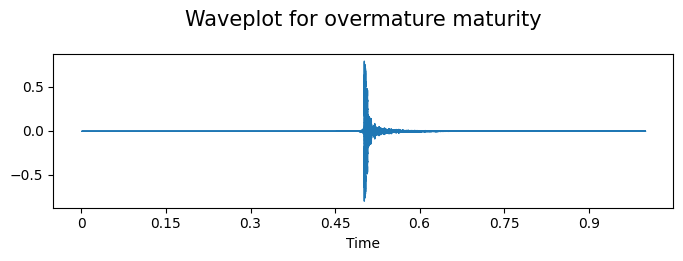

In [6]:
audio_overmature, sr_overmature = librosa.load(overmature)
createWaveplot(audio_overmature, sr_overmature, "overmature")
ipd.Audio(overmature)

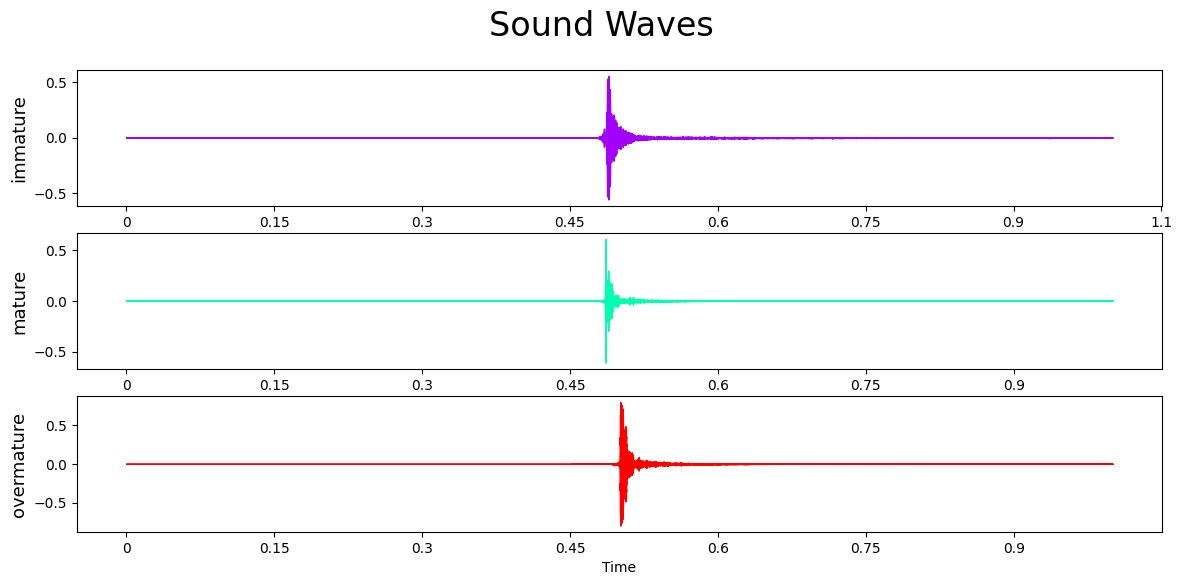

In [9]:
fig, ax = plt.subplots(3, figsize = (14, 6))
fig.suptitle('Sound Waves', fontsize=24)

librosa.display.waveshow(y = audio_immature, sr = sr_immature, color='#A300F9', ax=ax[0])
librosa.display.waveshow(y = audio_mature, sr = sr_mature, color='#00FFB0', ax=ax[1])
librosa.display.waveshow(y = audio_overmature, sr = sr_overmature, color='#FF0000', ax=ax[2])

for i, name in zip(range(3), classes):
    ax[i].set_ylabel(name, fontsize=13)

In [55]:

# wavSig, sampRate = librosa.load(immature)
def myFunction(a=2, b=3):
    """
    This function return a+b by default a = 2, b = 3
    """
    return a+b

In [56]:
print(myFunction.__doc__)


    This function return a+b by default a = 2, b = 3
    


In [64]:
from PNCC.pncc import pncc
import inspect

print(inspect.signature(pncc))

(audio_wave, n_fft=512, sr=16000, winlen=0.02, winstep=0.01, n_mels=128, n_pncc=13, weight_N=4, power=2)


In [91]:
from PNCC.pncc import pncc

wavSig, sampRate = librosa.load(df_wav[df_wav['class_name'] == "immature"].values[1][-1])
print(wavSig,len(wavSig), sampRate)
# pnccs = pncc(wavSig)

[-0.00046338 -0.00088546 -0.00072369 ...  0.00046966  0.00054059
  0.        ] 22045 22050


In [16]:
df_wav[df_wav['class_name'] == "mature"].values[0][0]

'./Sample-kelapa/data/cut_sample/matang/wav/mtg10a.wav'

In [10]:
wavSig, sampRate = librosa.load(df_wav[df_wav['class_name'] == "mature"].values[0][0])
# print(wavSig,len(wavSig), sampRate)
pnccs = pncc(wavSig, sampRate)

TypeError: mel() takes 0 positional arguments but 1 positional argument (and 2 keyword-only arguments) were given

In [92]:
from PNCC.pncc import pncc

wavSig, sampRate = librosa.load(df_wav[df_wav['class_name'] == "overmature"].values[0][-1])
print(wavSig,len(wavSig), sampRate)
# pnccs = pncc(wavSig)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -5.1452625e-05
  1.7647784e-05  2.6764070e-05] 22050 22050


In [131]:
i=5
sigImmature, srImmature = librosa.load(df_wav[df_wav['class_name'] == "immature"].values[i][-1])
sigMature, srMature = librosa.load(df_wav[df_wav['class_name'] == "mature"].values[i][-1])
sigOvermature, srOvermature = librosa.load(df_wav[df_wav['class_name'] == "overmature"].values[i][-1])

print("immature\t:")
print(f"  \u2022 Audio filename\t: {df_wav[df_wav['class_name'] == 'immature'].values[i][-1].split('/')[-1]}")
print(f"  \u2022 Audio sample\t: {sigImmature}")
print(f"  \u2022 Audio sample shape\t: {len(sigImmature)}")
print(f"  \u2022 Audio sample rate\t: {srImmature}\n")
print("mature\t\t:")
print(f"  \u2022 Audio filename\t: {df_wav[df_wav['class_name'] == 'mature'].values[i][-1].split('/')[-1]}")
print(f"  \u2022 Audio sample\t: {sigMature}")
print(f"  \u2022 Audio sample shape\t: {len(sigMature)}")
print(f"  \u2022 Audio sample rate\t: {srMature}\n")
print("overmature\t:")
print(f"  \u2022 Audio filename\t: {df_wav[df_wav['class_name'] == 'overmature'].values[i][-1].split('/')[-1]}")
print(f"  \u2022 Audio sample\t: {sigOvermature}")
print(f"  \u2022 Audio sample shape\t: {len(sigOvermature)}")
print(f"  \u2022 Audio sample rate\t: {srOvermature}\n")

immature	:
  • Audio filename	: muda11c.wav
  • Audio sample	: [-9.57154043e-05 -1.54114110e-04 -5.09603051e-05 ...  1.25326886e-04
  1.21904828e-04  1.00191544e-04]
  • Audio sample shape	: 22056
  • Audio sample rate	: 22050

mature		:
  • Audio filename	: mtg11c.wav
  • Audio sample	: [ 2.4222552e-05  2.5901476e-05 -4.4076723e-06 ... -1.6274418e-04
 -1.3448896e-04  1.3240037e-04]
  • Audio sample shape	: 22050
  • Audio sample rate	: 22050

overmature	:
  • Audio filename	: tua11c.wav
  • Audio sample	: [ 4.1138752e-05  4.4768531e-06 -5.9717233e-05 ...  2.8500042e-05
  3.3108823e-05  7.2935086e-06]
  • Audio sample shape	: 22050
  • Audio sample rate	: 22050



In [135]:
class Employee():
    # 👇️ forgot to take self arg
    def get_name():
        return 'Bobby Hadz'


emp = Employee()

# ⛔️ TypeError: Employee.get_name() takes 0 positional arguments but 1 was given
print(emp.get_name())


TypeError: Employee.get_name() takes 0 positional arguments but 1 was given